# NBA Free Throws - Focus on : LeBron James

## Load and check data

In [1]:
library(tidyverse)
library(ggthemes)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats
Warning message:
"package 'ggthemes' was built under R version 3.4.3"

In [2]:
data <- read.csv('free_throws.csv', stringsAsFactors = FALSE)

In [3]:
str(data)

'data.frame':	618019 obs. of  11 variables:
 $ end_result: chr  "106 - 114" "106 - 114" "106 - 114" "106 - 114" ...
 $ game      : chr  "PHX - LAL" "PHX - LAL" "PHX - LAL" "PHX - LAL" ...
 $ game_id   : num  2.61e+08 2.61e+08 2.61e+08 2.61e+08 2.61e+08 ...
 $ period    : num  1 1 1 1 1 1 1 2 2 2 ...
 $ play      : chr  "Andrew Bynum makes free throw 1 of 2" "Andrew Bynum makes free throw 2 of 2" "Andrew Bynum makes free throw 1 of 2" "Andrew Bynum misses free throw 2 of 2" ...
 $ player    : chr  "Andrew Bynum" "Andrew Bynum" "Andrew Bynum" "Andrew Bynum" ...
 $ playoffs  : chr  "regular" "regular" "regular" "regular" ...
 $ score     : chr  "0 - 1" "0 - 2" "18 - 12" "18 - 12" ...
 $ season    : chr  "2006 - 2007" "2006 - 2007" "2006 - 2007" "2006 - 2007" ...
 $ shot_made : int  1 1 1 0 1 1 1 0 1 1 ...
 $ time      : chr  "11:45" "11:45" "7:26" "7:26" ...


In [4]:
kingJames <- filter(data, player == 'LeBron James')

In [5]:
head(kingJames)

end_result,game,game_id,period,play,player,playoffs,score,season,shot_made,time
94 - 97,WSH - CLE,261101005,2,LeBron James misses free throw 1 of 2,LeBron James,regular,43 - 45,2006 - 2007,0,1:31
94 - 97,WSH - CLE,261101005,2,LeBron James misses free throw 2 of 2,LeBron James,regular,43 - 45,2006 - 2007,0,1:31
94 - 97,WSH - CLE,261101005,3,LeBron James misses free throw 1 of 2,LeBron James,regular,69 - 74,2006 - 2007,0,0:03
94 - 97,WSH - CLE,261101005,3,LeBron James makes free throw 2 of 2,LeBron James,regular,69 - 75,2006 - 2007,1,0:03
94 - 97,WSH - CLE,261101005,4,LeBron James misses free throw 1 of 2,LeBron James,regular,69 - 78,2006 - 2007,0,10:41
94 - 97,WSH - CLE,261101005,4,LeBron James makes free throw 2 of 2,LeBron James,regular,69 - 79,2006 - 2007,1,10:41


    We have 11 variables and actually all of them self-descriptive. game_id column shows id that are unique to each match but I don't know there is a special meaning of these values. Player column is not benefical for us anymore so we can drop it. 

In [6]:
# It is obvious that some of our features are categorical. For now, let's make four of them categorical. 

kingJames$shot_made = factor(kingJames$shot_made)
kingJames$period = factor(kingJames$period)
kingJames$playoffs = factor(kingJames$playoffs)
kingJames$season = factor(kingJames$season)

In [7]:
summary(kingJames)

  end_result            game              game_id          period  
 Length:8001        Length:8001        Min.   :261101005   1:1732  
 Class :character   Class :character   1st Qu.:281206030   2:2006  
 Mode  :character   Mode  :character   Median :310104014   3:1881  
                                       Mean   :329192203   4:2263  
                                       3rd Qu.:400488962   5: 100  
                                       Max.   :400878160   6:  19  
                                                                   
     play              player              playoffs       score          
 Length:8001        Length:8001        playoffs:1683   Length:8001       
 Class :character   Class :character   regular :6318   Class :character  
 Mode  :character   Mode  :character                   Mode  :character  
                                                                         
                                                                         
            

In [8]:
# let's look our dataframe for missing values.

sapply(kingJames, function(x) sum(is.na(x)))

end_result       game    game_id     period       play     player   playoffs 
         0          0          0          0          0          0          0 
     score     season  shot_made       time 
         0          0          0          0

## Generating New Features

    Feature engineering can be seen as transforming raw data into new features in order to better represent and understand underlying problem. In order to explore FT % of LeBron James across different variables, I will generate new features with the help of the current dataset and some basic outside knowledge(like team, coach or conference).

### Cleveland or Miami ?

In [9]:
findTeam <- function(season){
  miami <- c('2010 - 2011', '2011 - 2012', '2012 - 2013', '2013 - 2014')
  if (season %in% miami){
    team <- 'MIA'
  }else{
    team <- 'CLE'
  }
  return(team)
}

findTeam2 <- function(season){
  team <- findTeam(season)
  cle2 <- c('2014 - 2015', '2015 - 2016')
  if (team == 'CLE' & season %in% cle2){
    team = 'CLE - 2'
  }else if (team == 'CLE'){
    team = 'CLE - 1'
  }
  return (team)
}

kingJames$team = mapply(findTeam, kingJames$season)
kingJames$team = factor(kingJames$team)

kingJames$team2 = mapply(findTeam2, kingJames$season)
kingJames$team2 = factor(kingJames$team2)

### Home or Away ?

In [10]:
homeOrAway <- function(game,season){
  teamOfKing = findTeam(season)
  if (teamOfKing == sub(' - \\w*', '', game)){
    hoa = 'Home'
  }else {
    hoa = 'Away'
  }
  return(hoa)
}

kingJames$home_or_away = mapply(homeOrAway, kingJames$game, kingJames$season)
kingJames$home_or_away = factor(kingJames$home_or_away)

### Win or Lose ?

In [11]:
winOrLose <- function(end_result,game,season){
  hoa = homeOrAway(game,season)
  hteam = as.numeric(sub(' - \\d*', '', end_result))
  ateam = as.numeric(sub('\\d* - ', '', end_result))
  c1 = hteam > ateam
  c2 = hoa == 'Home'
  if (c1 & c2){
    wol = 'Win'
  } else if (c1 & !c2){
    wol = 'Lose'
  } else if (!c1 & c2){
    wol = 'Lose'
  } else {
    wol = 'Win'
  }
  return(wol)
}

kingJames$win_or_lose = mapply(winOrLose, kingJames$end_result, kingJames$game
                               ,kingJames$season)
kingJames$win_or_lose = factor(kingJames$win_or_lose)

In [12]:
takeDifferenceEnd <- function(end_result,game,season){
  wol = winOrLose(end_result, game, season)
  hteam = as.numeric(sub(' - \\d*', '', end_result))
  ateam = as.numeric(sub('\\d* - ', '', end_result))
  if (wol == 'Win'){
    diff = abs(hteam - ateam)
  } else {
    diff = -abs(hteam - ateam)
  }
  return(diff)
}

kingJames$endDifference = mapply(takeDifferenceEnd, kingJames$end_result, kingJames$game
                              , kingJames$season)

### Leading or not ? 

In [13]:
leadingOrNot <- function(score,game,season){
  hoa = homeOrAway(game,season)
  hteam = as.numeric(sub(' - \\d*', '', score))
  ateam = as.numeric(sub('\\d* - ', '', score))
  c1 = hteam >= ateam
  c2 = hoa == 'Home'
  if (c1 & c2){
    lor = 'Lead'
  } else if (c1 & !c2){
    lor = 'Not Lead'
  } else if (!c1 & c2){
    lor = 'Not Lead'
  } else {
    lor = 'Lead'
  }
  return(lor)
}

kingJames$leading = mapply(leadingOrNot, kingJames$score, kingJames$game
                           ,kingJames$season)
kingJames$leading = factor(kingJames$leading)

In [14]:
takeDifference <- function(score,game,season){
  lor = leadingOrNot(score, game, season)
  hteam = as.numeric(sub(' - \\d*', '', score))
  ateam = as.numeric(sub('\\d* - ', '', score))
  if (lor == 'Lead'){
    diff = abs(hteam - ateam)
  } else {
    diff = -abs(hteam - ateam)
  }
  return(diff)
}

kingJames$difference = mapply(takeDifference, kingJames$score, kingJames$game
                              , kingJames$season)

### Who is the coach ? 

In [15]:
findCoach = function(season){
  brown <- c('2006 - 2007', '2007 - 2008', '2008 - 2009', '2009 - 2010')
  erik <- c('2010 - 2011', '2011 - 2012', '2012 - 2013', '2013 - 2014')
  blatt <- c('2014 - 2015', '2015 - 2016')
  if (season %in% brown){
    coach <- 'Mike Brown'
  } else if (season %in% erik){
    coach <- 'Erik Spoelstra'
  } else if(season %in% blatt) {
    coach = 'David Blatt'
  }
  return (coach)
}

kingJames$coach <- mapply(findCoach, kingJames$season)
kingJames$coach = factor(kingJames$coach)

### Who is the opponent ? 

In [16]:
findOpponent = function(season, game){
  hoa = homeOrAway(game, season)
  if (hoa == 'Home'){
    opp = sub('\\w* - ', '', game)
  }else {
    opp = sub(' - \\w*', '', game)
  }
  return (opp)
}

kingJames$opponent <- mapply(findOpponent, kingJames$season, kingJames$game)


In [17]:
kingJames$opponent[kingJames$opponent == 'SEA'] <- 'OKC'

kingJames$opponent[kingJames$opponent == 'NJ'] <- 'BKN'

kingJames$opponent = factor(kingJames$opponent)

### East or West ?

In [18]:
findConference = function(opponent){
  east <- c('BOS', 'TOR', 'NY', 'PHI', 'BKN', 'DET', 'MIL', 'CLE', 'IND', 'CHI',
           'WSH', 'ORL', 'MIA', 'CHA', 'ATL')
  if (opponent == 'EAST'){
    con <- 'NONE'
  }else if (opponent %in% east){
    con <- 'EAST'
  }else {
    con <- 'WEST'
  }
  return (con)
}

kingJames$conference = mapply(findConference, kingJames$opponent)
kingJames$conference = factor(kingJames$conference)

### Divisions ..

In [19]:
findDivision = function(opponent){
  teams = list(c('BOS','TOR','NY','PHI','BKN'), c('DET','MIL','CLE','IND','CHI'),
               c('WSH','ORL','MIA','CHA','ATL'),c('MIN','DEN','POR','OKC','UTAH'),
               c('GS','LAL','LAC','PHX','SAC'),c('HOU','SA','NO','MEM','DAL'))
  divisions = c('Atlantic', 'Central', 'Southeast', 'Northwest', 'Pasific',
                'Southwest')
  div = 'None'
  for (i in 1:6){
    if (opponent %in% teams[[i]]){
      div = divisions[i]
    }
  }
  return (div)
}

kingJames$division  = mapply(findDivision, kingJames$opponent)
kingJames$division = factor(kingJames$division)

### Free throw splits - 1 of 2, 2 of 2 etc.

In [20]:
kingJames <-mutate(kingJames, n_free_throw = 
                substring(play, regexpr("(.[123].*)|(.technical.*)", play) + 1))


In [21]:
# Let's look what we get after this operation 

summary(factor(kingJames$n_free_throw))

1 of 1                         1 of 2 
                           943                           3355 
                        1 of 3                         2 of 2 
                            34                           3366 
                        2 of 3                         3 of 3 
                            34                             34 
 LeBron James makes free throw LeBron James misses free throw 
                            34                             14 
          technical free throw 
                           187

    We expect that 1 of 2 and 2 of 2 must be equal but it is not. Also we have 'Lebron James makes..' and 'Lebron James misse..' categories that must belong to other categories. I solved this problem manually by looking this problematic categories(categories begin with Lebron) one by one. I don't know are there any other ways to fix this problem but with the help of score and time variables , it is possible to solve this problem manually.

In [22]:
one_of_one = c(4428,5141)
one_of_two = c(131,260,289,347,887,907,1324,1681,1693,1741,1758,1990,2351,2435,
               2506,2767,2835,2917,3298,3448,3637,3831,3911,4530,4602,
               4708,4868)
two_of_two = c(132,290,346,886,906,1325,1638,1682,1694,1742,1759,1991,2352,
               2436,2768,2836,2918,3299,3447,3638,3830,3910,4529,4603,4709,
               4869)

tot_ft = c(one_of_one, one_of_two, two_of_two)

In [23]:
for (i in tot_ft){
  if (i %in% one_of_one){
    kingJames$n_free_throw[i] = '1 of 1'
  }else if(i %in% one_of_two){
    kingJames$n_free_throw[i] = '1 of 2'
  }else {
    kingJames$n_free_throw[i] = '2 of 2'
  }
}

kingJames$n_free_throw = factor(kingJames$n_free_throw)

In [24]:
# Although still our 1 of 2 and 2 of 2 categories are not equal, difference is small so we can ignore it.

summary(kingJames$n_free_throw)

1 of 1               1 of 2               1 of 3 
                 945                 3382                   34 
              2 of 2               2 of 3               3 of 3 
                3385                   34                   34 
technical free throw 
                 187

### Dealing with Time

In [25]:
findPeriodMinutesLeft = function(time){
  minLeft = as.numeric(sub(':\\d*', '', time))
  return(minLeft)
}

kingJames$minute_left = mapply(findPeriodMinutesLeft, kingJames$time)

In [26]:
findTotalMinutesLeft = function(time, period){
  pMinLeft = findPeriodMinutesLeft(time)
  if (as.numeric(period) > 4){
    totMinLeft = pMinLeft
  }else{
    totMinLeft = pMinLeft + (4 - as.numeric(period)) * 12
  }
  return (totMinLeft)
}

kingJames$tot_min_left = mapply(findTotalMinutesLeft, kingJames$time, 
                                kingJames$period)

In [27]:
findPeriodSecondsLeft = function(time){
  minutes = as.numeric(sub(':\\d*', '', time))
  seconds = as.numeric(sub('\\d*:', '', time))
  secondsLeft = minutes * 60 + seconds
  return (secondsLeft)
}

kingJames$seconds_left  = mapply(findPeriodSecondsLeft, kingJames$time)

In [28]:
findTotalSecondsLeft = function(time, period){
  pSecLeft = findPeriodSecondsLeft(time)
  if (as.numeric(period) > 4){
    totSecLeft = pSecLeft
  }else {
    totSecLeft = pSecLeft + (4 - as.numeric(period)) * 12 * 60
  }
  return (totSecLeft)
}

kingJames$tot_sec_left = mapply(findTotalSecondsLeft, kingJames$time,
                                kingJames$period)

In [29]:
# total minute left will not be very natural when we make plots so lets generate minute feature
kingJames = mutate(kingJames, minute = 48 - tot_min_left)

In [30]:
# Let's finally look our variables

summary(kingJames)

  end_result            game              game_id          period  
 Length:8001        Length:8001        Min.   :261101005   1:1732  
 Class :character   Class :character   1st Qu.:281206030   2:2006  
 Mode  :character   Mode  :character   Median :310104014   3:1881  
                                       Mean   :329192203   4:2263  
                                       3rd Qu.:400488962   5: 100  
                                       Max.   :400878160   6:  19  
                                                                   
     play              player              playoffs       score          
 Length:8001        Length:8001        playoffs:1683   Length:8001       
 Class :character   Class :character   regular :6318   Class :character  
 Mode  :character   Mode  :character                   Mode  :character  
                                                                         
                                                                         
            

In [31]:
# Some rows taking from all-star games and I think these are not very helpful for us. Let's remove them.
exclude <- filter(kingJames, conference == 'NONE')

In [32]:
kingJames <- anti_join(kingJames, exclude)

Joining, by = c("end_result", "game", "game_id", "period", "play", "player", "playoffs", "score", "season", "shot_made", "time", "team", "team2", "home_or_away", "win_or_lose", "endDifference", "leading", "difference", "coach", "opponent", "conference", "division", "n_free_throw", "minute_left", "tot_min_left", "seconds_left", "tot_sec_left", "minute")


In [33]:
summary(kingJames)

  end_result            game              game_id          period  
 Length:7982        Length:7982        Min.   :261101005   1:1726  
 Class :character   Class :character   1st Qu.:281206030   2:2005  
 Mode  :character   Mode  :character   Median :310104014   3:1876  
                                       Mean   :329261173   4:2256  
                                       3rd Qu.:400488980   5: 100  
                                       Max.   :400878160   6:  19  
                                                                   
     play              player              playoffs       score          
 Length:7982        Length:7982        playoffs:1683   Length:7982       
 Class :character   Class :character   regular :6299   Class :character  
 Mode  :character   Mode  :character                   Mode  :character  
                                                                         
                                                                         
            

## Data Visualization

### General 

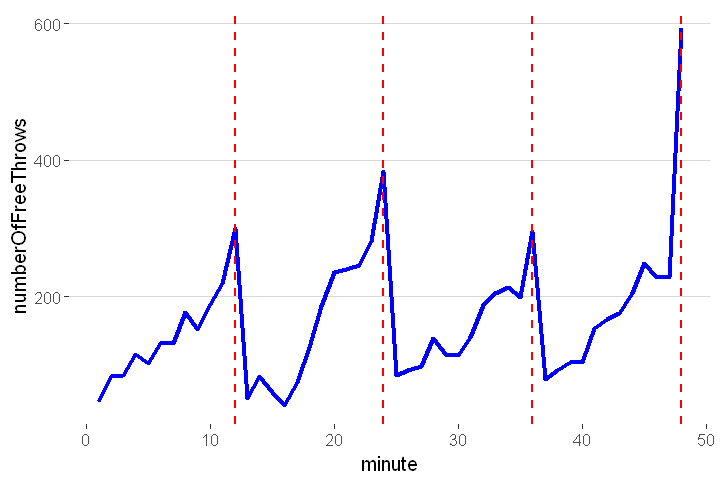

In [34]:
options(repr.plot.width=6, repr.plot.height=4)

o1 <- kingJames %>%
    group_by(minute) %>%
    summarise(numberOfFreeThrows = n()) 

ggplot(data = o1, aes(x = minute, y = numberOfFreeThrows)) + 
    geom_line(size = 1.2,linetype = 1,color=4)+
    geom_vline(xintercept=c(12,24,36,48), linetype=2,color = 'red',size = 0.75)+
    theme_hc()

    For each period, we can see that number of FT increase when we approach end of the period. As expected, this trend more powerful at the end of the first half and especially at the end of the match. 

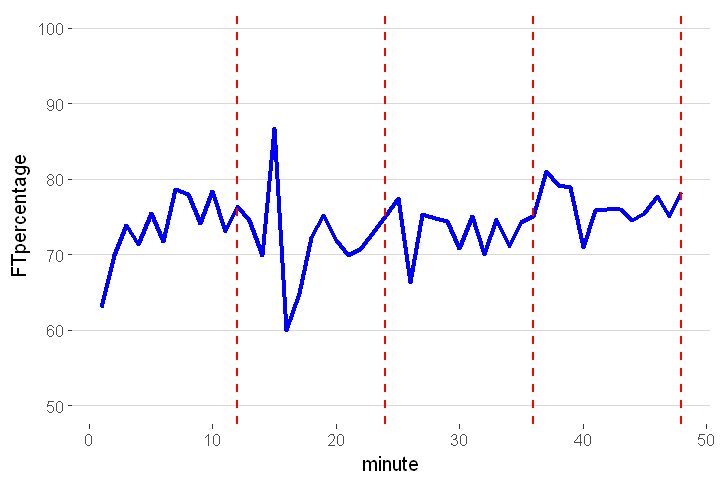

In [35]:
m1 <- kingJames %>%
    group_by(minute, shot_made) %>%
    summarise(numberOfShots = n()) %>%
    mutate(FTpercentage = numberOfShots / sum(numberOfShots)*100) %>%
    filter(shot_made == 1)

ggplot(data = m1, aes(x = minute, y = FTpercentage)) + 
    geom_line(size = 1.2,linetype = 1,color=4)+
    geom_vline(xintercept=c(12,24,36,48), linetype=2,color = 'red',size = 0.75)+
    scale_y_continuous(limits = c(50,100))+
    theme_hc()

    There are a lot of oscillation in this plot. There are 48 points here and sepecially for the first minutes of the periods, there are very few observation and most probably this is the reason for that. Therefore, I generally prefer periods not minutes for other plots.

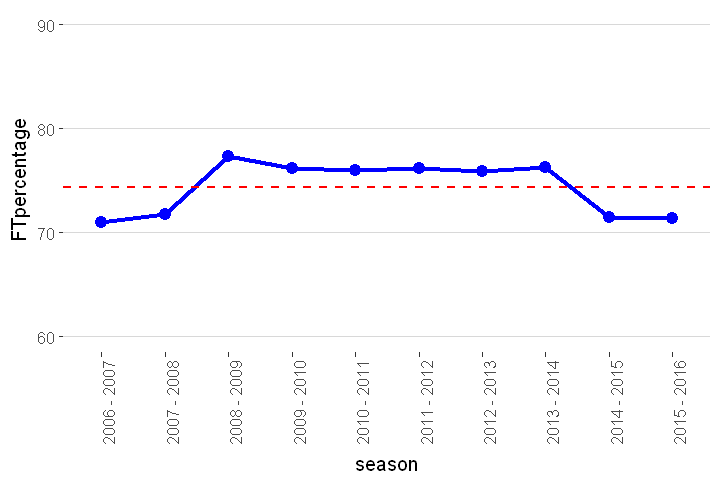

In [36]:
averageFT = (5939 / 7982) * 100

s1 <- kingJames %>%
    group_by(season, shot_made) %>%
    summarise(numberOfShots = n()) %>%
    mutate(FTpercentage = numberOfShots / sum(numberOfShots)*100) %>%
    filter(shot_made == 1)

ggplot(data = s1, aes(x = season, y = FTpercentage,group = 1)) + 
    geom_line(size = 1.2,linetype = 1,color = 4)+
    geom_point(size = 3, color = 4) +
    scale_y_continuous(limits = c(60,90))+
    geom_hline(yintercept=averageFT, linetype=2,color = 'red',size = 0.75)+
    theme_hc() + 
    theme(axis.text.x = element_text(angle = 90, hjust = 1))

### Home - Away

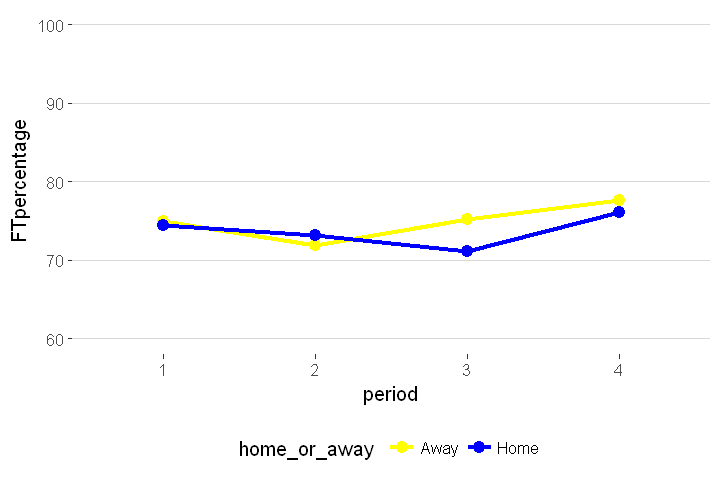

In [37]:
p2 <- kingJames %>%
    group_by(period,home_or_away, shot_made) %>%
    summarise(numberOfShots = n()) %>%
    mutate(FTpercentage = numberOfShots / sum(numberOfShots)*100) %>%
    filter(shot_made == 1, as.numeric(period) < 5)


ggplot(data = p2, aes(x = period, y = FTpercentage,color = home_or_away)) + 
    geom_line(aes(group = home_or_away),size = 1.2,linetype = 1)+
    geom_point(size = 3)+
    scale_y_continuous(limits = c(60,100))+
    scale_color_manual(values=c("yellow", "blue"))+
    theme_hc()

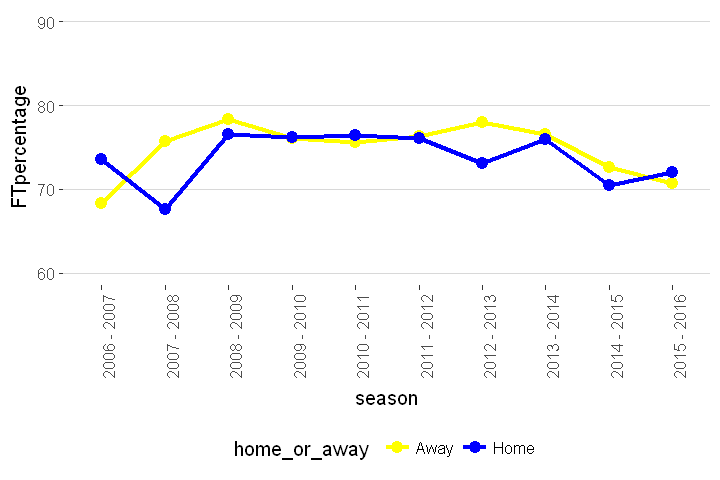

In [38]:
s2 <- kingJames %>%
    group_by(season,home_or_away, shot_made) %>%
    summarise(numberOfShots = n()) %>%
    mutate(FTpercentage = numberOfShots / sum(numberOfShots)*100) %>%
    filter(shot_made == 1)

ggplot(data = s2, aes(x = season, y = FTpercentage,color = home_or_away)) + 
    geom_line(aes(group = home_or_away),size = 1.2,linetype = 1)+
    geom_point(size = 3) +
    scale_y_continuous(limits = c(60,90))+
    scale_color_manual(values=c("yellow", "blue"))+
    theme_hc() + 
    theme(axis.text.x = element_text(angle = 90, hjust = 1))

### Lead - Not Lead

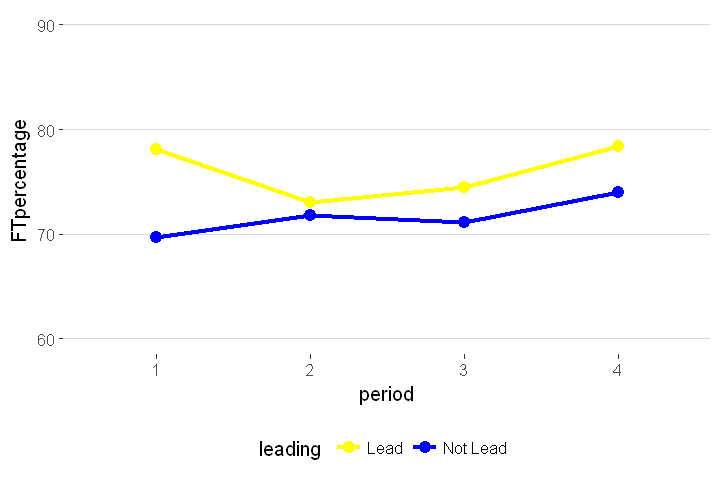

In [39]:
p3 <- kingJames %>%
    group_by(period,leading, shot_made) %>%
    summarise(numberOfShots = n()) %>%
    mutate(FTpercentage = numberOfShots / sum(numberOfShots)*100) %>%
    filter(shot_made == 1, as.numeric(period) < 5)


ggplot(data = p3, aes(x = period, y = FTpercentage,color = leading)) + 
    geom_line(aes(group = leading),size = 1.2,linetype = 1)+
    geom_point(size = 3)+
    scale_y_continuous(limits = c(60,90))+
    scale_color_manual(values=c("yellow", "blue"))+
    theme_hc()

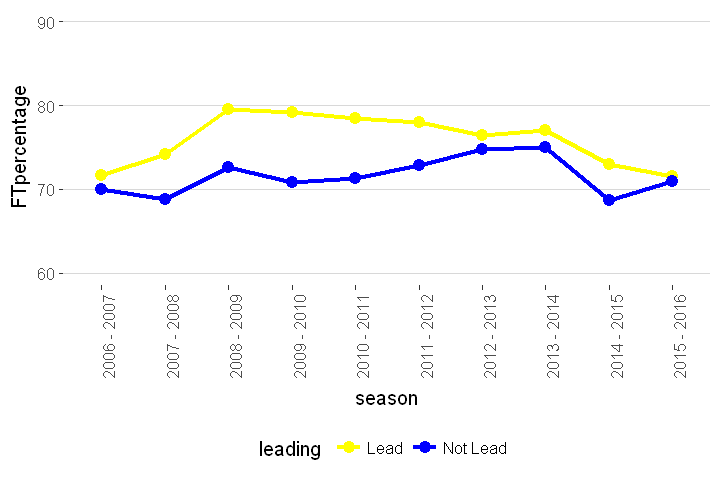

In [40]:
s3 <- kingJames %>%
    group_by(season, leading, shot_made) %>%
    summarise(numberOfShots = n()) %>%
    mutate(FTpercentage = numberOfShots / sum(numberOfShots)*100) %>%
    filter(shot_made == 1)

ggplot(data = s3, aes(x = season, y = FTpercentage,color = leading)) + 
    geom_line(aes(group = leading),size = 1.2,linetype = 1)+
    geom_point(size = 3) +
    scale_y_continuous(limits = c(60,90))+
    scale_color_manual(values=c("yellow", "blue"))+
    theme_hc() + 
    theme(axis.text.x = element_text(angle = 90, hjust = 1))

    Can we say that LeBron struggle shooting free throws under pressure ? It is obvious that for all seasons he was better shoot when his team lead. Maybe the most important point is the last period when the fate of the match determined and his performance much better here when his team lead.

### Miami - Cleveland

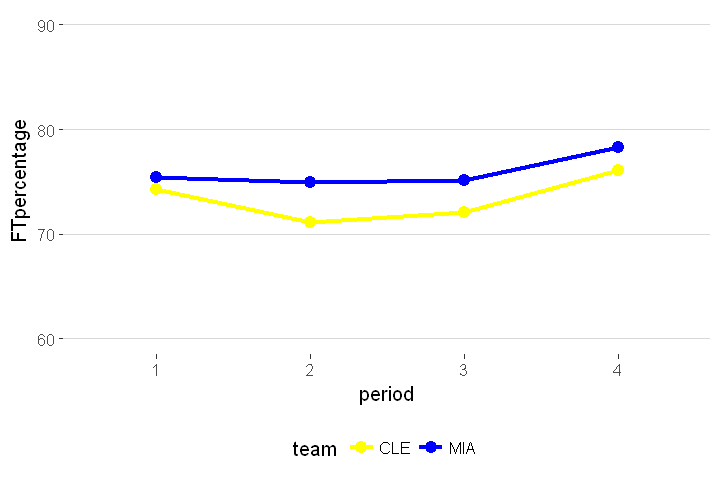

In [41]:
p4 <- kingJames %>%
    group_by(period,team, shot_made) %>%
    summarise(numberOfShots = n()) %>%
    mutate(FTpercentage = numberOfShots / sum(numberOfShots)*100) %>%
    filter(shot_made == 1,as.numeric(period) < 5)

ggplot(data = p4, aes(x = period, y = FTpercentage,color = team)) + 
    geom_line(aes(group = team),size = 1.2,linetype = 1)+
    geom_point(size = 3) +
    scale_y_continuous(limits = c(60,90))+
    scale_color_manual(values=c("yellow", "blue"))+
    theme_hc()

### Playoffs

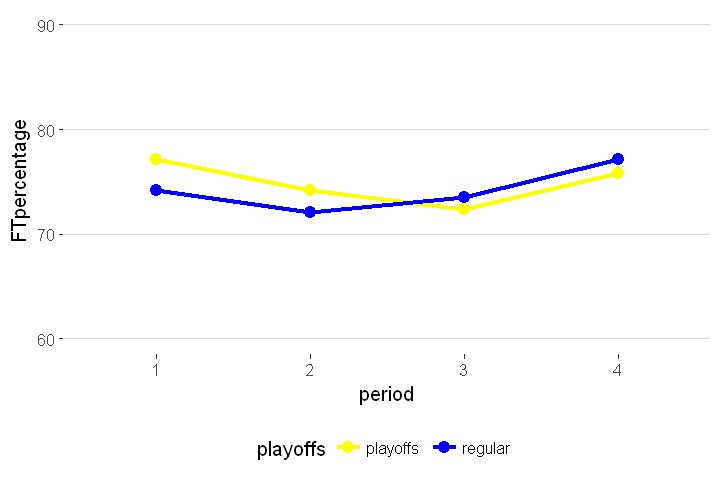

In [42]:
p5 <- kingJames %>%
    group_by(period,playoffs, shot_made) %>%
    summarise(numberOfShots = n()) %>%
    mutate(FTpercentage = numberOfShots / sum(numberOfShots)*100) %>%
    filter(shot_made == 1,as.numeric(period) < 5)

ggplot(data = p5, aes(x = period, y = FTpercentage,color = playoffs)) + 
    geom_line(aes(group = playoffs),size = 1.2,linetype = 1)+
    geom_point(size = 3) +
    scale_y_continuous(limits = c(60,90))+
    scale_color_manual(values=c("yellow", "blue"))+
    theme_hc()

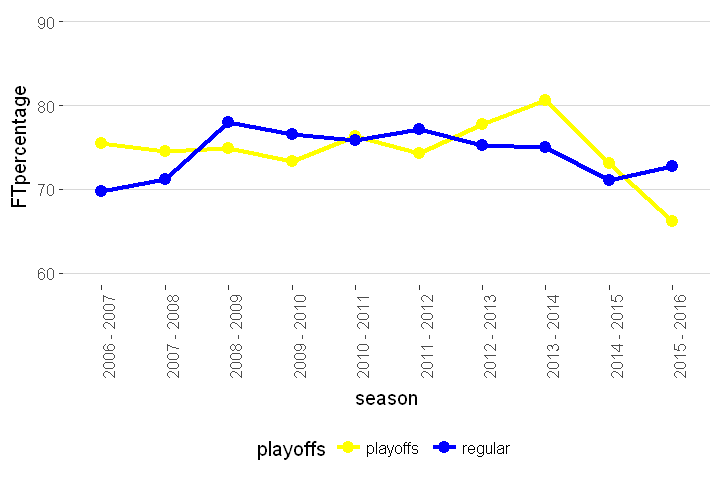

In [43]:
s5 <- kingJames %>%
    group_by(season, playoffs, shot_made) %>%
    summarise(numberOfShots = n()) %>%
    mutate(FTpercentage = numberOfShots / sum(numberOfShots)*100) %>%
    filter(shot_made == 1)

ggplot(data = s5, aes(x = season, y = FTpercentage,color = playoffs)) + 
    geom_line(aes(group = playoffs),size = 1.2,linetype = 1)+
    geom_point(size = 3) +
    scale_y_continuous(limits = c(60,90))+
    scale_color_manual(values=c("yellow", "blue"))+
    theme_hc() + 
    theme(axis.text.x = element_text(angle = 90, hjust = 1))

    2011-2012, 2012-2013 and 2015-2016 seasons are the seasons that LeBron's team was champion and he was named final's MVP. It is interesting to see that for these seasons his playoffs free throw performance same or worse than regular season performance.

### Win - Lose

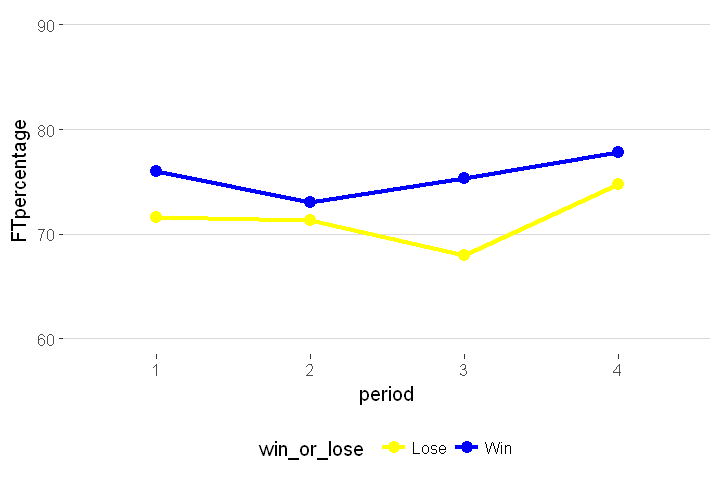

In [44]:
p6 <- kingJames %>%
    group_by(period, win_or_lose, shot_made) %>%
    summarise(numberOfShots = n()) %>%
    mutate(FTpercentage = numberOfShots / sum(numberOfShots)*100) %>%
    filter(shot_made == 1, as.numeric(period) < 5)


ggplot(data = p6, aes(x = period, y = FTpercentage,color = win_or_lose)) + 
    geom_line(aes(group = win_or_lose),size = 1.2,linetype = 1)+
    geom_point(size = 3) +
    scale_y_continuous(limits = c(60,90))+
    scale_color_manual(values=c("yellow", "blue"))+
    theme_hc()

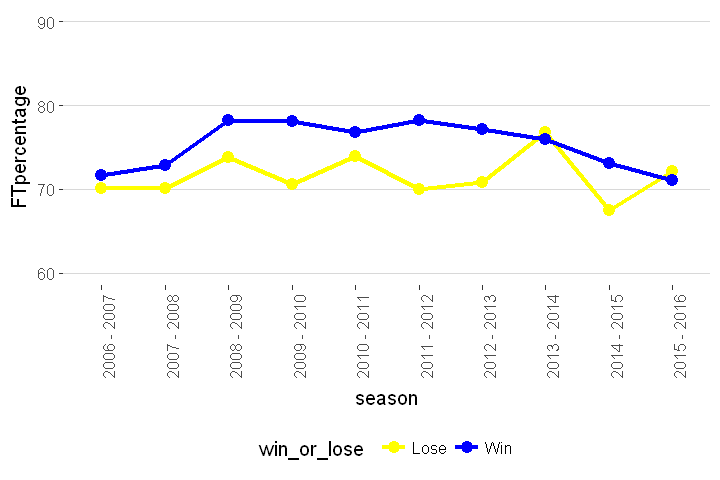

In [45]:
s2 <- kingJames %>%
    group_by(season, win_or_lose, shot_made) %>%
    summarise(numberOfShots = n()) %>%
    mutate(FTpercentage = numberOfShots / sum(numberOfShots)*100) %>%
    filter(shot_made == 1)

ggplot(data = s2, aes(x = season, y = FTpercentage,color = win_or_lose)) + 
    geom_line(aes(group = win_or_lose),size = 1.2,linetype = 1)+
    geom_point(size = 3) +
    scale_y_continuous(limits = c(60,90))+
    scale_color_manual(values=c("yellow", "blue"))+
    theme_hc() + 
    theme(axis.text.x = element_text(angle = 90, hjust = 1))

    The most interesting point for me here is that the matches which LeBron's team lost, his third period average FT % below the 70 percent and approximately there is a 6-7 % difference between FT % of winning and losing matches. 

### East - West

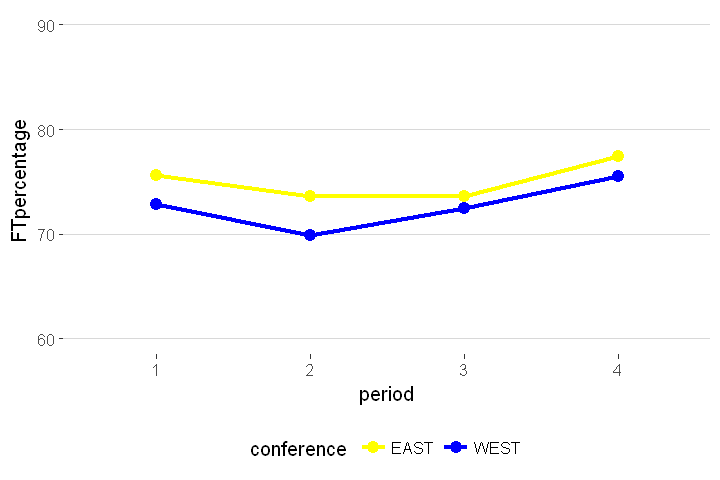

In [46]:
p7 <- kingJames %>%
    group_by(period, conference, shot_made) %>%
    summarise(numberOfShots = n()) %>%
    mutate(FTpercentage = numberOfShots / sum(numberOfShots)*100) %>%
    filter(shot_made == 1, as.numeric(period) < 5)

ggplot(data = p7, aes(x = period, y = FTpercentage,color = conference)) + 
    geom_line(aes(group = conference),size = 1.2,linetype = 1)+
    geom_point(size = 3) +
    scale_y_continuous(limits = c(60,90))+
    scale_color_manual(values=c("yellow", "blue"))+
    theme_hc()

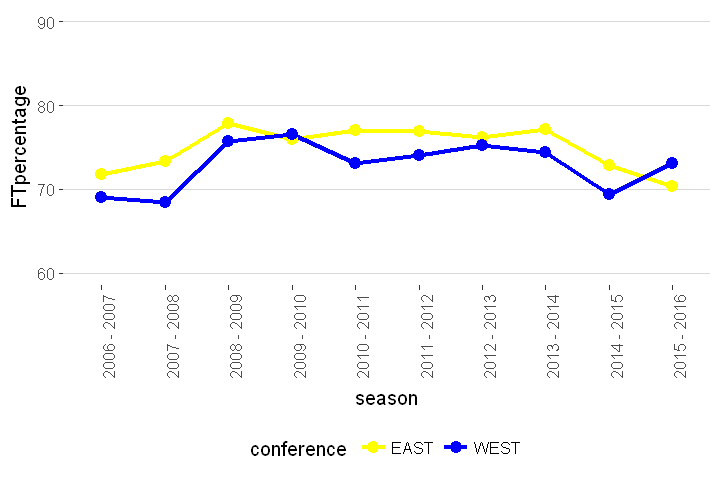

In [47]:
s2 <- kingJames %>%
    group_by(season, conference, shot_made) %>%
    summarise(numberOfShots = n()) %>%
    mutate(FTpercentage = numberOfShots / sum(numberOfShots)*100) %>%
    filter(shot_made == 1)

ggplot(data = s2, aes(x = season, y = FTpercentage,color = conference)) + 
    geom_line(aes(group = conference),size = 1.2,linetype = 1)+
    geom_point(size = 3) +
    scale_y_continuous(limits = c(60,90))+
    scale_color_manual(values=c("yellow", "blue"))+
    theme_hc() + 
    theme(axis.text.x = element_text(angle = 90, hjust = 1))

### Coach

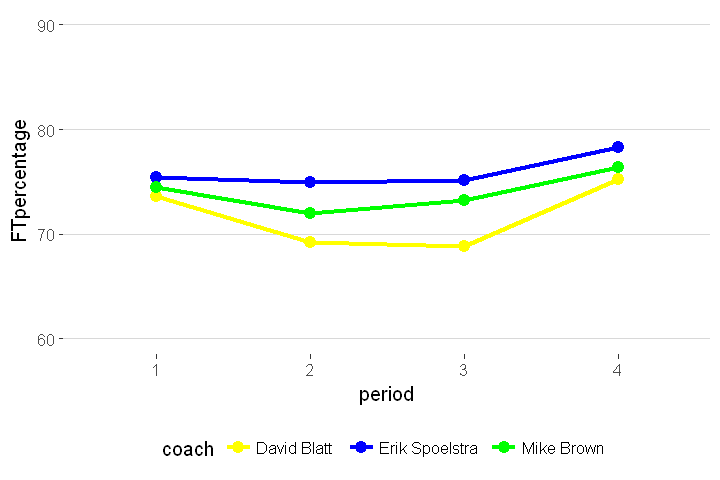

In [48]:
p8 <- kingJames %>%
    group_by(period, coach, shot_made) %>%
    summarise(numberOfShots = n()) %>%
    mutate(FTpercentage = numberOfShots / sum(numberOfShots)*100) %>%
    filter(shot_made == 1,as.numeric(period) < 5)

ggplot(data = p8, aes(x = period, y = FTpercentage,color = coach)) + 
    geom_line(aes(group = coach),size = 1.2,linetype = 1)+
    geom_point(size = 3) +
    scale_y_continuous(limits = c(60,90))+
    scale_color_manual(values=c("yellow", "blue","green"))+
    theme_hc()

    Actually we can also evaluate this plot as LeBron FT performance in CLE-1, MIA, CLE-2 instead of with Mike Brown, Erik Spoelstra and David Blatt. Maybe it is good to remind that LeBron work 4 season with Brown and Spoelstra and 2 season(almost) with Blatt.

### 1 of 2 - 2 of 2

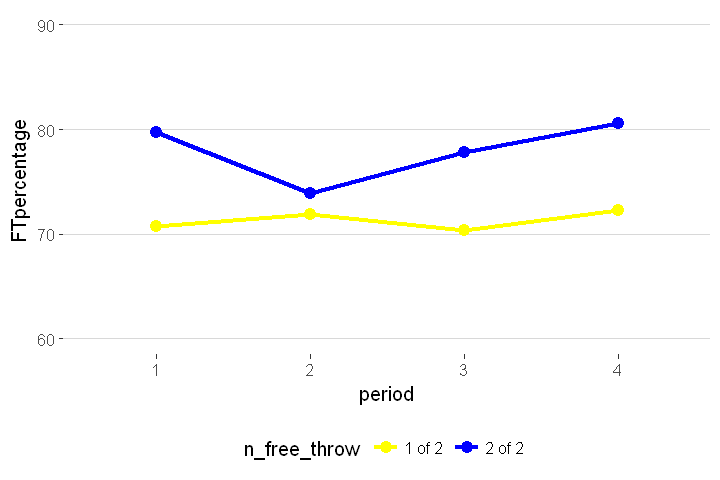

In [49]:
p8 <- kingJames %>%
    group_by(period, n_free_throw, shot_made) %>%
    summarise(numberOfShots = n()) %>%
    mutate(FTpercentage = numberOfShots / sum(numberOfShots)*100) %>%
    filter(shot_made == 1,as.numeric(period) < 5,
          n_free_throw %in% c('1 of 2', '2 of 2'))

ggplot(data = p8, aes(x = period, y = FTpercentage,color = n_free_throw)) + 
    geom_line(aes(group = n_free_throw),size = 1.2,linetype = 1)+
    geom_point(size = 3) +
    scale_y_continuous(limits = c(60,90))+
    scale_color_manual(values=c("yellow", "blue","green"))+
    theme_hc()

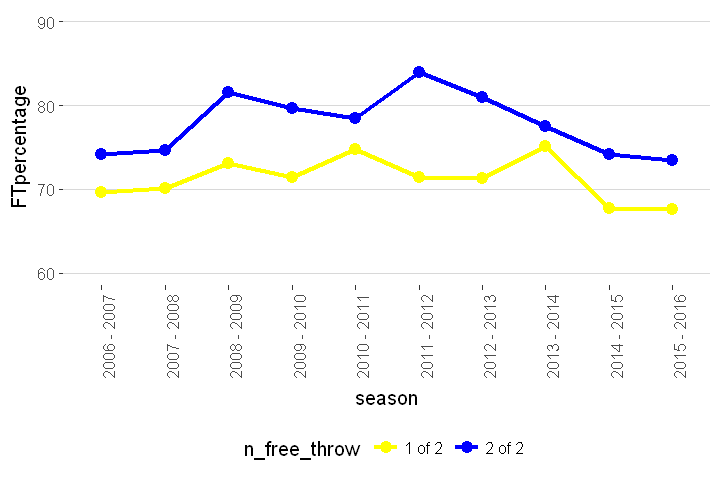

In [50]:
s2 <- kingJames %>%
    group_by(season, n_free_throw, shot_made) %>%
    summarise(numberOfShots = n()) %>%
    mutate(FTpercentage = numberOfShots / sum(numberOfShots)*100) %>%
    filter(shot_made == 1, n_free_throw %in% c('1 of 2', '2 of 2'))

ggplot(data = s2, aes(x = season, y = FTpercentage,color = n_free_throw)) + 
    geom_line(aes(group = n_free_throw),size = 1.2,linetype = 1)+
    geom_point(size = 3) +
    scale_y_continuous(limits = c(60,90))+
    scale_color_manual(values=c("yellow", "blue"))+
    theme_hc() + 
    theme(axis.text.x = element_text(angle = 90, hjust = 1))

    LeBron is far better at free throw 2 of 2 for all seasons and periods. Maybe it is not special to LeBron but still it is good to see.

### Difference

In [51]:
theme_x <- theme_hc() + theme(strip.background  = element_rect(fill = 'black'),
                           strip.text = element_text(color = 'white', size = 11), panel.spacing = unit(1.25, "lines"))

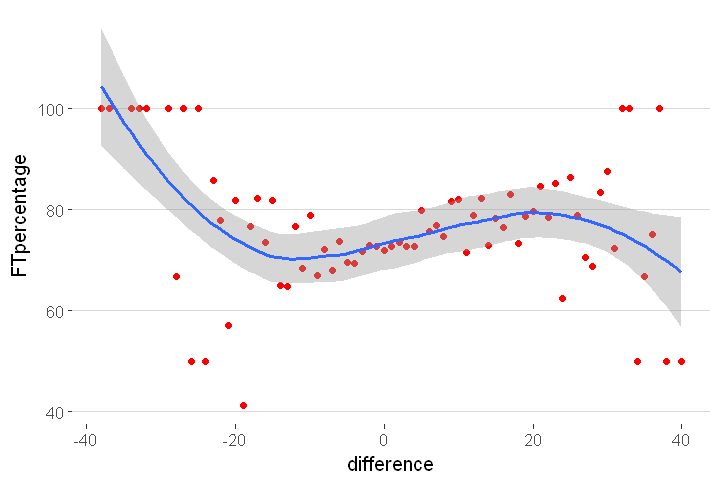

In [52]:
s4 <- kingJames %>% 
  group_by(difference,shot_made) %>%
  summarise(n = n()) %>%
  mutate(FTpercentage = n / sum(n)*100) %>%
  filter(shot_made == 1)

ggplot(data = s4, aes(x = difference, y = FTpercentage)) + 
    geom_point(color = 2)+
    geom_smooth(method = loess)+
    theme_x

### End Difference

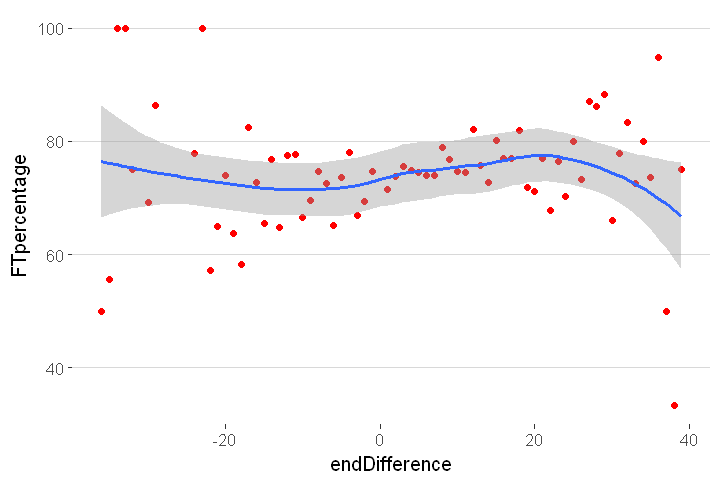

In [53]:
s4 <- kingJames %>% 
  group_by(endDifference,shot_made) %>%
  summarise(n = n()) %>%
  mutate(FTpercentage = n / sum(n)*100) %>%
  filter(shot_made == 1)

ggplot(data = s4, aes(x = endDifference, y = FTpercentage)) + 
    geom_point(color = 2)+
    geom_smooth(method = loess)+
    theme_x

## Digging Into Details

In [54]:
theme_x <- theme_hc() + theme(strip.background  = element_rect(fill = 'black'),
                           strip.text = element_text(color = 'white', size = 11), panel.spacing = unit(1.25, "lines"))
options(repr.plot.width=6.5, repr.plot.height=4.25)

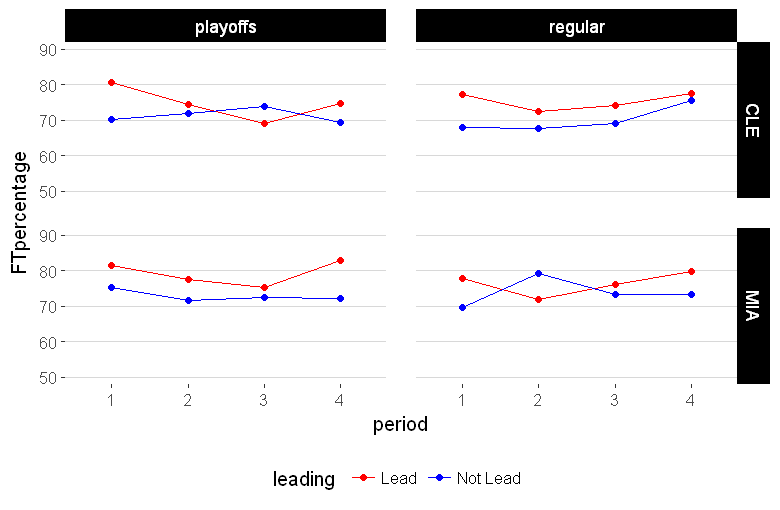

In [55]:
x1 <- kingJames %>% 
  group_by(team, period,playoffs,leading, shot_made) %>%
  summarise(n = n()) %>%
  mutate(FTpercentage = n / sum(n)*100) %>%
  filter(shot_made == 1, as.numeric(period) < 5)


ggplot(data = x1, aes(x = period, y = FTpercentage, color = leading)) + 
    geom_point()+
    geom_line(aes(group = leading)) +
    facet_grid(team ~ playoffs) +
    scale_y_continuous(limits = c(50, 90))+
    scale_color_manual(values=c("red", "blue"))+
    theme_x

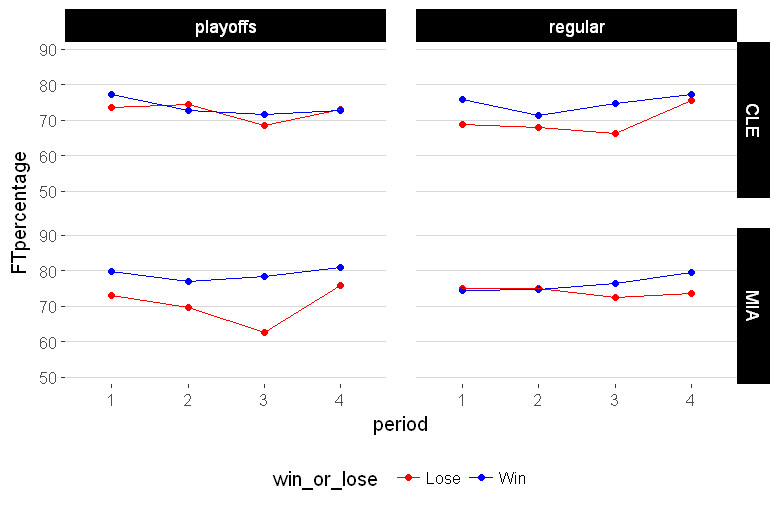

In [56]:
x2 <- kingJames %>% 
  group_by(team, period,playoffs,win_or_lose, shot_made) %>%
  summarise(n = n()) %>%
  mutate(FTpercentage = n / sum(n)*100) %>%
  filter(shot_made == 1, as.numeric(period) < 5)


ggplot(data = x2, aes(x = period, y = FTpercentage, color = win_or_lose)) + 
    geom_point()+
    geom_line(aes(group = win_or_lose)) +
    facet_grid(team ~ playoffs) +
    scale_y_continuous(limits = c(50, 90))+
    scale_color_manual(values=c("red", "blue"))+
    theme_x

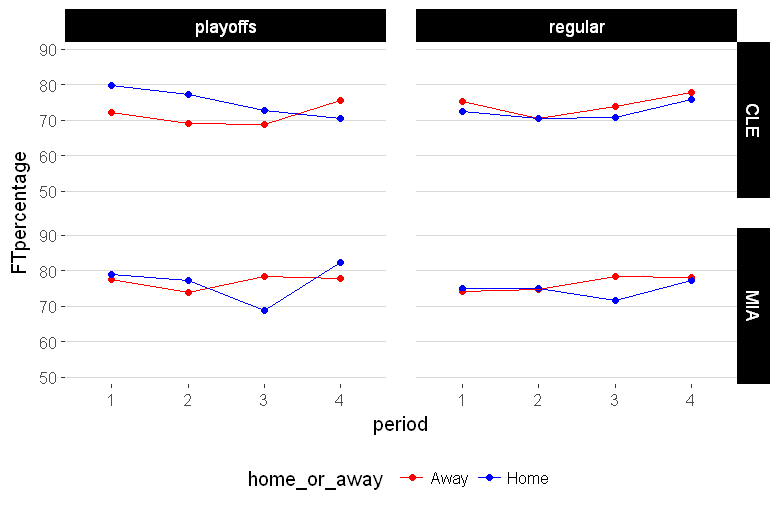

In [57]:
x3 <- kingJames %>% 
  group_by(team, period,playoffs,home_or_away, shot_made) %>%
  summarise(n = n()) %>%
  mutate(FTpercentage = n / sum(n)*100) %>%
  filter(shot_made == 1, as.numeric(period) < 5)


ggplot(data = x3, aes(x = period, y = FTpercentage, color = home_or_away)) + 
    geom_point()+
    geom_line(aes(group = home_or_away)) +
    facet_grid(team ~ playoffs) +
    scale_y_continuous(limits = c(50, 90))+
    scale_color_manual(values=c("red", "blue"))+
    theme_x

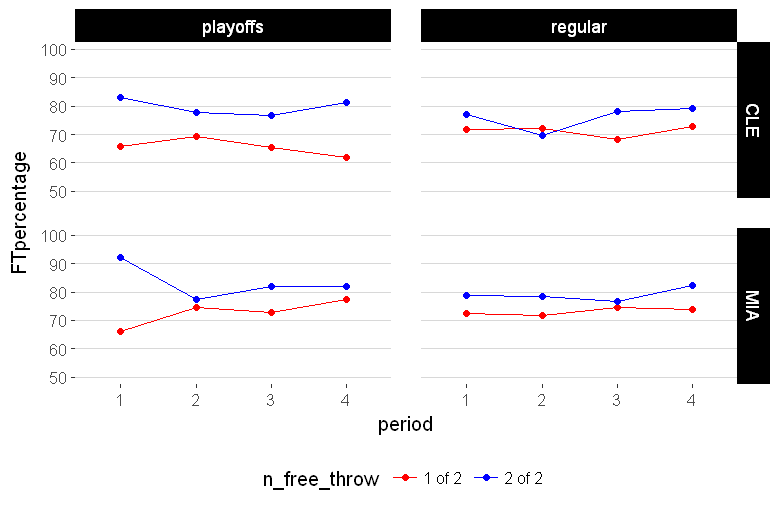

In [58]:
x4 <- kingJames %>% 
  group_by(team, period,playoffs,n_free_throw, shot_made) %>%
  summarise(n = n()) %>%
  mutate(FTpercentage = n / sum(n)*100) %>%
  filter(shot_made == 1,n_free_throw %in% c('1 of 2', '2 of 2'),
         as.numeric(period) < 5)


ggplot(data = x4, aes(x = period, y = FTpercentage, color = n_free_throw)) + 
    geom_point()+
    geom_line(aes(group = n_free_throw)) +
    facet_grid(team ~ playoffs) +
    scale_y_continuous(limits = c(50, 100))+
    scale_color_manual(values=c("red", "blue"))+
    theme_x

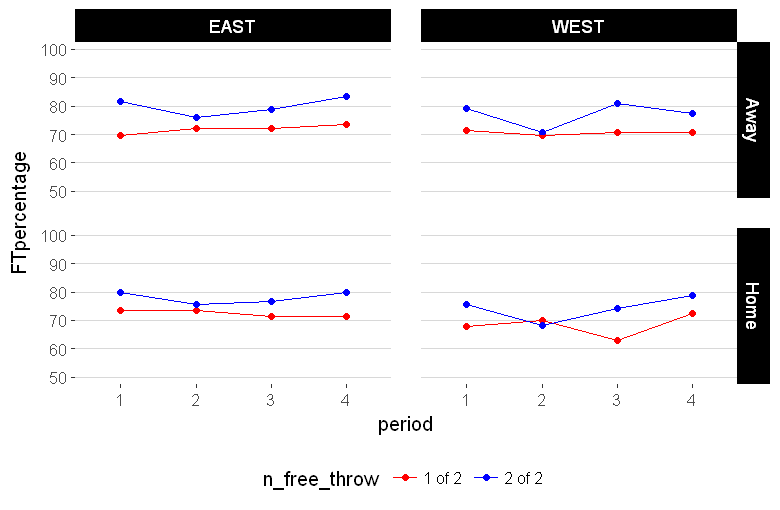

In [59]:
x5 <- kingJames %>% 
  group_by(home_or_away, period,conference,n_free_throw, shot_made) %>%
  summarise(n = n()) %>%
  mutate(FTpercentage = n / sum(n)*100) %>%
  filter(shot_made == 1,n_free_throw %in% c('1 of 2', '2 of 2'),
         as.numeric(period) < 5)


ggplot(data = x5, aes(x = period, y = FTpercentage, color = n_free_throw)) + 
    geom_point()+
    geom_line(aes(group = n_free_throw)) +
    facet_grid(home_or_away ~ conference) +
    scale_y_continuous(limits = c(50, 100))+
    scale_color_manual(values=c("red", "blue"))+
    theme_x

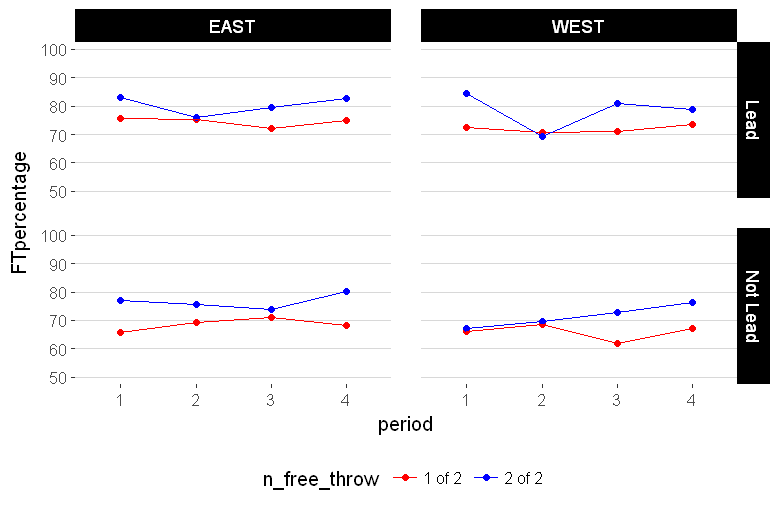

In [60]:
x6 <- kingJames %>% 
  group_by(leading, period,conference,n_free_throw, shot_made) %>%
  summarise(n = n()) %>%
  mutate(FTpercentage = n / sum(n)*100) %>%
  filter(shot_made == 1,n_free_throw %in% c('1 of 2', '2 of 2'),
         as.numeric(period) < 5)


ggplot(data = x6, aes(x = period, y = FTpercentage, color = n_free_throw)) + 
    geom_point()+
    geom_line(aes(group = n_free_throw)) +
    facet_grid(leading ~ conference) +
    scale_y_continuous(limits = c(50, 100))+
    scale_color_manual(values=c("red", "blue"))+
    theme_x

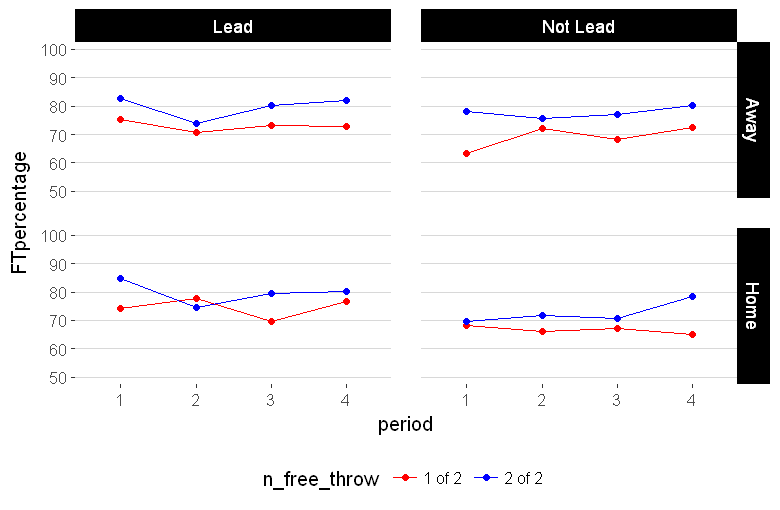

In [61]:
x7 <- kingJames %>% 
  group_by(home_or_away, period,leading,n_free_throw, shot_made) %>%
  summarise(n = n()) %>%
  mutate(FTpercentage = n / sum(n)*100) %>%
  filter(shot_made == 1,n_free_throw %in% c('1 of 2', '2 of 2'),
         as.numeric(period) < 5)


ggplot(data = x7, aes(x = period, y = FTpercentage, color = n_free_throw)) + 
    geom_point()+
    geom_line(aes(group = n_free_throw)) +
    facet_grid(home_or_away ~ leading) +
    scale_y_continuous(limits = c(50, 100))+
    scale_color_manual(values=c("red", "blue"))+
    theme_x

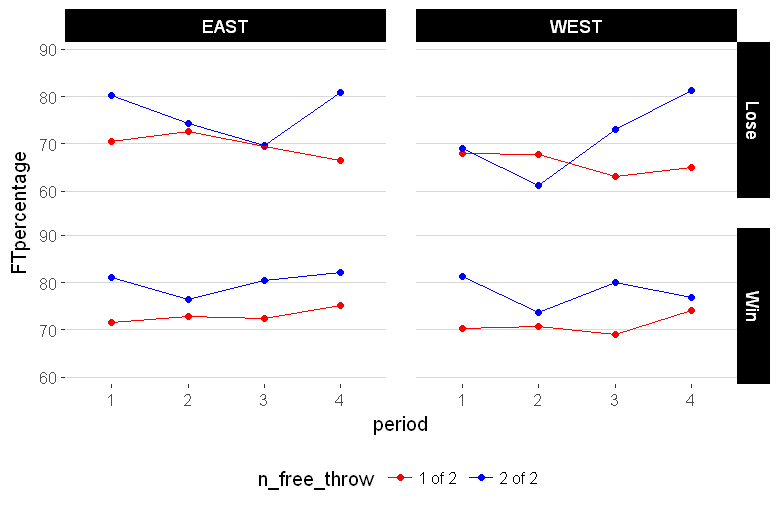

In [62]:
x7 <- kingJames %>% 
  group_by(win_or_lose, period,conference,n_free_throw, shot_made) %>%
  summarise(n = n()) %>%
  mutate(FTpercentage = n / sum(n)*100) %>%
  filter(shot_made == 1,n_free_throw %in% c('1 of 2', '2 of 2'),
         as.numeric(period) < 5)


ggplot(data = x7, aes(x = period, y = FTpercentage, color = n_free_throw)) + 
    geom_point()+
    geom_line(aes(group = n_free_throw)) +
    facet_grid(win_or_lose ~ conference) +
    scale_y_continuous(limits = c(60, 90))+
    scale_color_manual(values=c("red", "blue"))+
    theme_x

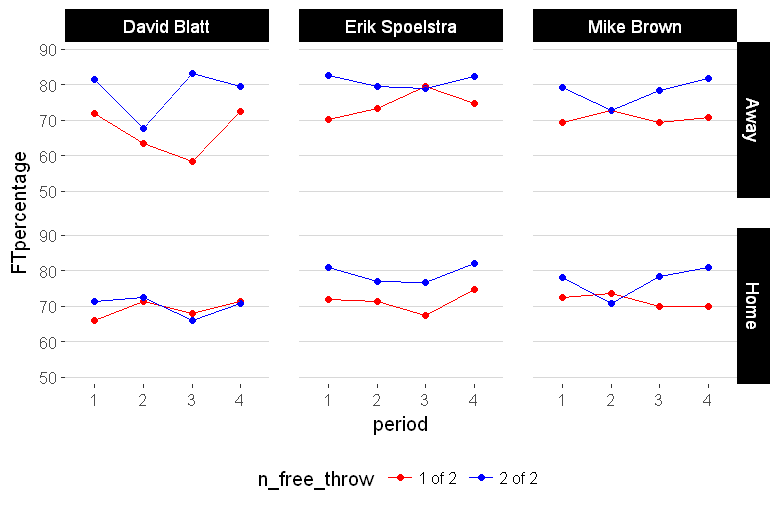

In [63]:
x9 <- kingJames %>% 
  group_by(home_or_away, period,coach,n_free_throw, shot_made) %>%
  summarise(n = n()) %>%
  mutate(FTpercentage = n / sum(n)*100) %>%
  filter(shot_made == 1,n_free_throw %in% c('1 of 2', '2 of 2'),
         as.numeric(period) < 5)


ggplot(data = x9, aes(x = period, y = FTpercentage, color = n_free_throw)) + 
    geom_point()+
    geom_line(aes(group = n_free_throw)) +
    facet_grid(home_or_away~ coach) +
    scale_y_continuous(limits = c(50, 90))+
    scale_color_manual(values=c("red", "blue"))+
    theme_x

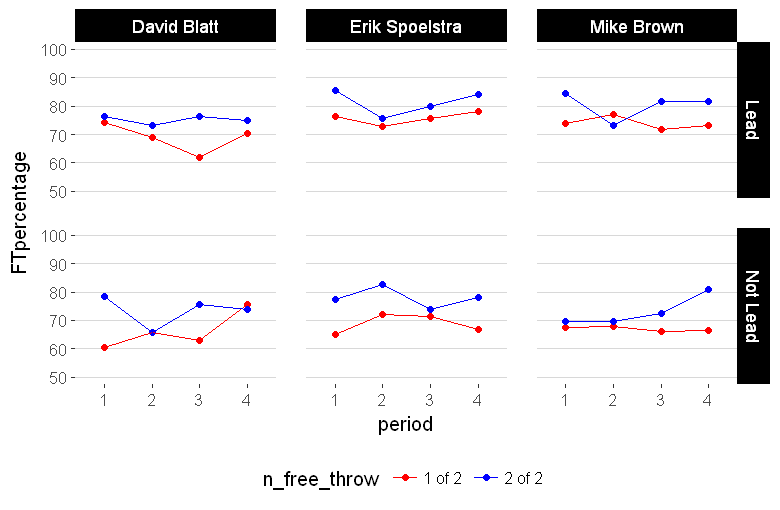

In [64]:
x10 <- kingJames %>% 
  group_by(leading, period,coach,n_free_throw, shot_made) %>%
  summarise(n = n()) %>%
  mutate(FTpercentage = n / sum(n)*100) %>%
  filter(shot_made == 1,n_free_throw %in% c('1 of 2', '2 of 2'),
         as.numeric(period) < 5)


ggplot(data = x10, aes(x = period, y = FTpercentage, color = n_free_throw)) + 
    geom_point()+
    geom_line(aes(group = n_free_throw)) +
    facet_grid(leading~ coach) +
    scale_y_continuous(limits = c(50, 100))+
    scale_color_manual(values=c("red", "blue"))+
    theme_x

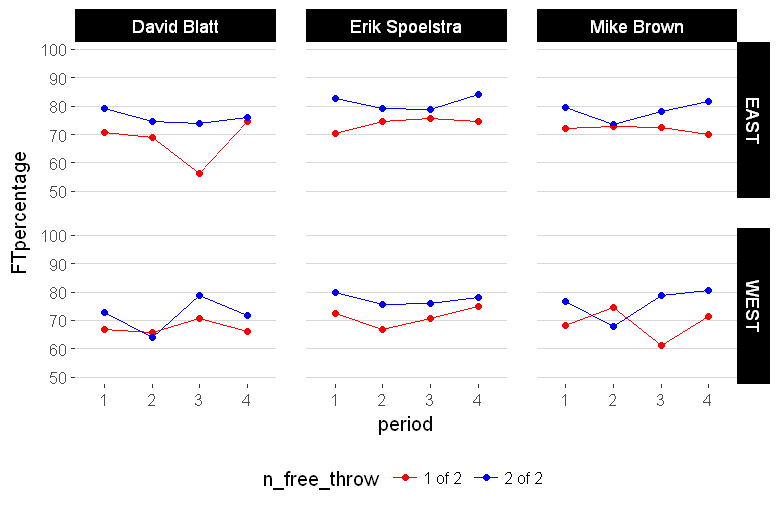

In [65]:
x11 <- kingJames %>% 
  group_by(conference, period,coach,n_free_throw, shot_made) %>%
  summarise(n = n()) %>%
  mutate(FTpercentage = n / sum(n)*100) %>%
  filter(shot_made == 1,n_free_throw %in% c('1 of 2', '2 of 2'),
         as.numeric(period) < 5)


ggplot(data = x11, aes(x = period, y = FTpercentage, color = n_free_throw)) + 
    geom_point()+
    geom_line(aes(group = n_free_throw)) +
    facet_grid(conference ~ coach) +
    scale_y_continuous(limits = c(50, 100))+
    scale_color_manual(values=c("red", "blue"))+
    theme_x

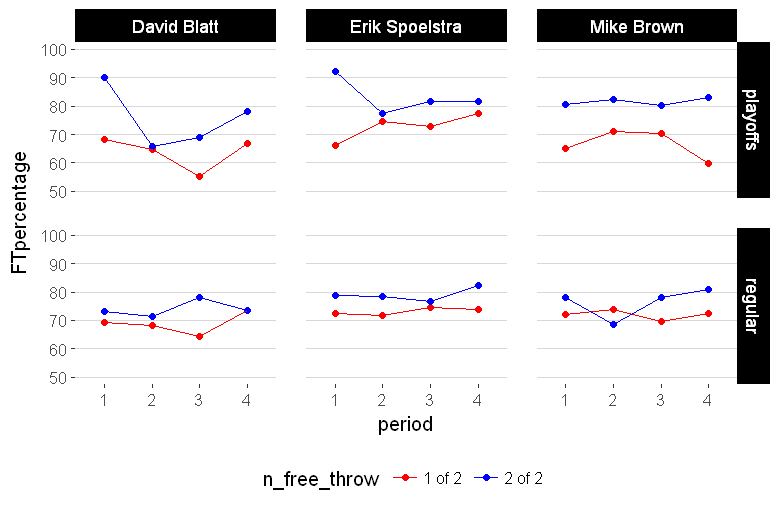

In [66]:
x12 <- kingJames %>% 
  group_by(playoffs, period,coach,n_free_throw, shot_made) %>%
  summarise(n = n()) %>%
  mutate(FTpercentage = n / sum(n)*100) %>%
  filter(shot_made == 1,n_free_throw %in% c('1 of 2', '2 of 2'),
         as.numeric(period) < 5)


ggplot(data = x12, aes(x = period, y = FTpercentage, color = n_free_throw)) + 
    geom_point()+
    geom_line(aes(group = n_free_throw)) +
    facet_grid(playoffs ~ coach) +
    scale_y_continuous(limits = c(50, 100))+
    scale_color_manual(values=c("red", "blue"))+
    theme_x

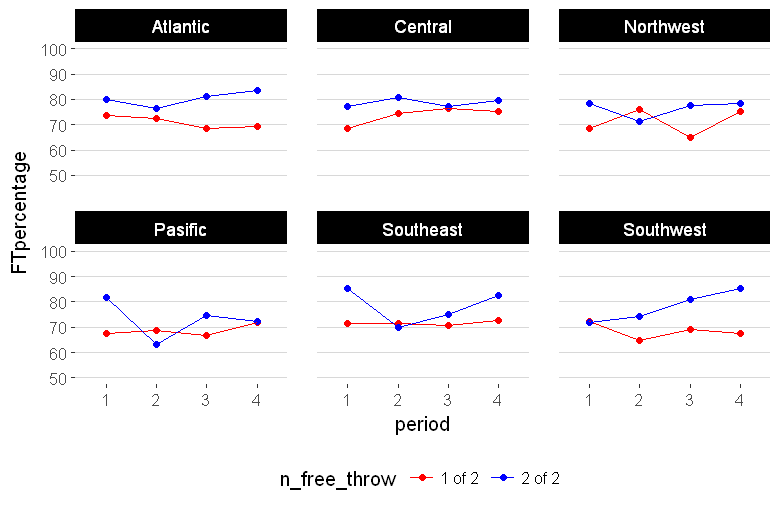

In [67]:
x13 <- kingJames %>% 
  group_by(division, period,n_free_throw, shot_made) %>%
  summarise(n = n()) %>%
  mutate(FTpercentage = n / sum(n)*100) %>%
  filter(shot_made == 1,n_free_throw %in% c('1 of 2', '2 of 2'),
         as.numeric(period) < 5)


ggplot(data = x13, aes(x = period, y = FTpercentage, color = n_free_throw)) + 
    geom_point()+
    geom_line(aes(group = n_free_throw)) +
    facet_wrap(~ division) +
    scale_y_continuous(limits = c(50, 100))+
    scale_color_manual(values=c("red", "blue"))+
    theme_x

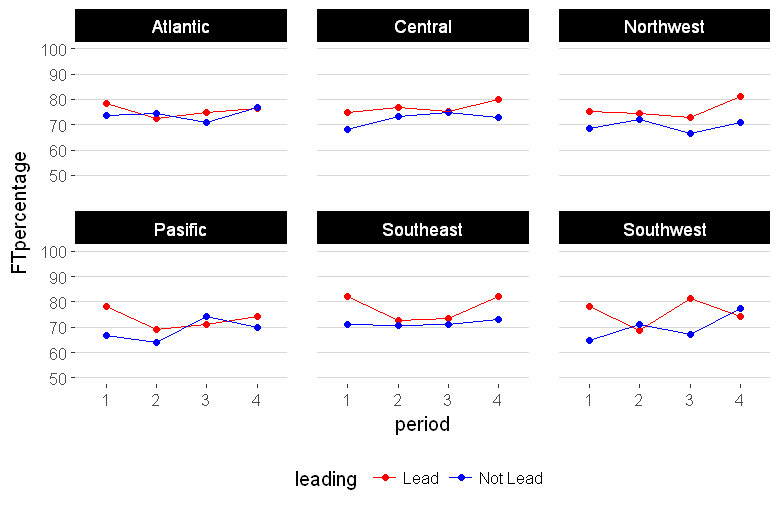

In [68]:
x14 <- kingJames %>% 
  group_by(division, period,leading, shot_made) %>%
  summarise(n = n()) %>%
  mutate(FTpercentage = n / sum(n)*100) %>%
  filter(shot_made == 1,as.numeric(period) < 5)


ggplot(data = x14, aes(x = period, y = FTpercentage, color = leading)) + 
    geom_point()+
    geom_line(aes(group = leading)) +
    facet_wrap(~ division) +
    scale_y_continuous(limits = c(50, 100))+
    scale_color_manual(values=c("red", "blue"))+
    theme_x

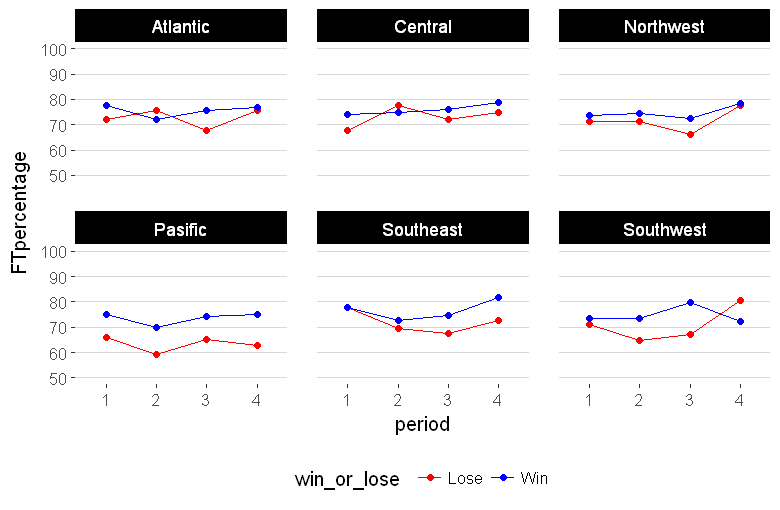

In [69]:
x15 <- kingJames %>% 
  group_by(division, period,win_or_lose, shot_made) %>%
  summarise(n = n()) %>%
  mutate(FTpercentage = n / sum(n)*100) %>%
  filter(shot_made == 1,as.numeric(period) < 5)


ggplot(data = x15, aes(x = period, y = FTpercentage, color = win_or_lose)) + 
    geom_point()+
    geom_line(aes(group = win_or_lose)) +
    facet_wrap(~ division) +
    scale_y_continuous(limits = c(50, 100))+
    scale_color_manual(values=c("red", "blue"))+
    theme_x

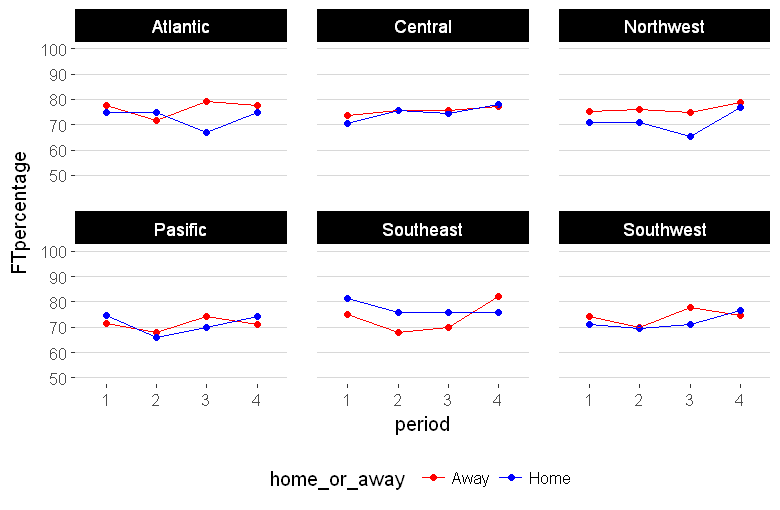

In [70]:
x16 <- kingJames %>% 
  group_by(division, period, home_or_away, shot_made) %>%
  summarise(n = n()) %>%
  mutate(FTpercentage = n / sum(n)*100) %>%
  filter(shot_made == 1,as.numeric(period) < 5)


ggplot(data = x16, aes(x = period, y = FTpercentage, color = home_or_away)) + 
    geom_point()+
    geom_line(aes(group = home_or_away)) +
    facet_wrap(~ division) +
    scale_y_continuous(limits = c(50, 100))+
    scale_color_manual(values=c("red", "blue"))+
    theme_x

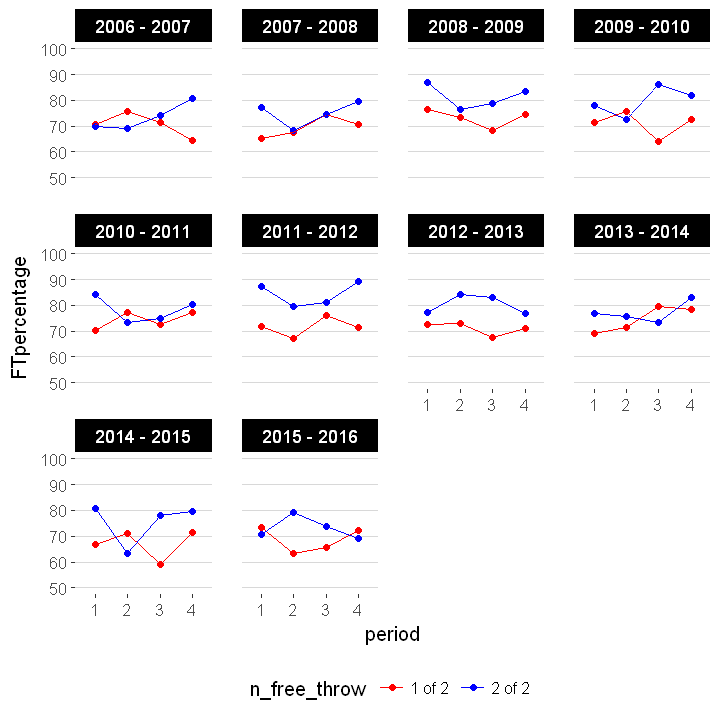

In [71]:
options(repr.plot.width=6, repr.plot.height=6)

x17 <- kingJames %>% 
  group_by(period, season,n_free_throw, shot_made) %>%
  summarise(n = n()) %>%
  mutate(FTpercentage = n / sum(n)*100) %>%
  filter(shot_made == 1, n_free_throw %in% c('1 of 2', '2 of 2'),
         as.numeric(period) < 5)

ggplot(data = x17, aes(x = period, y = FTpercentage, color = n_free_throw)) + 
    geom_point()+
    geom_line(aes(group = n_free_throw)) +
    facet_wrap(~season) +
    scale_color_manual(values=c("red", "blue"))+
    scale_y_continuous(limits = c(50, 100))+
    theme_x 
    

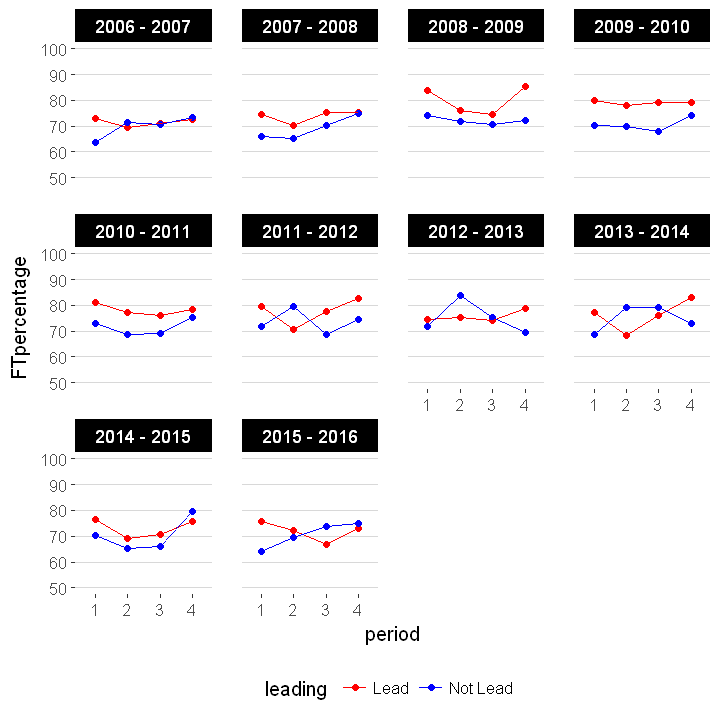

In [72]:
x18 <- kingJames %>% 
  group_by(period, season,leading, shot_made) %>%
  summarise(n = n()) %>%
  mutate(FTpercentage = n / sum(n)*100) %>%
  filter(shot_made == 1, as.numeric(period) < 5)

ggplot(data = x18, aes(x = period, y = FTpercentage, color = leading)) + 
    geom_point()+
    geom_line(aes(group = leading)) +
    facet_wrap(~season) +
    scale_color_manual(values=c("red", "blue"))+
    scale_y_continuous(limits = c(50, 100))+
    theme_x 
    

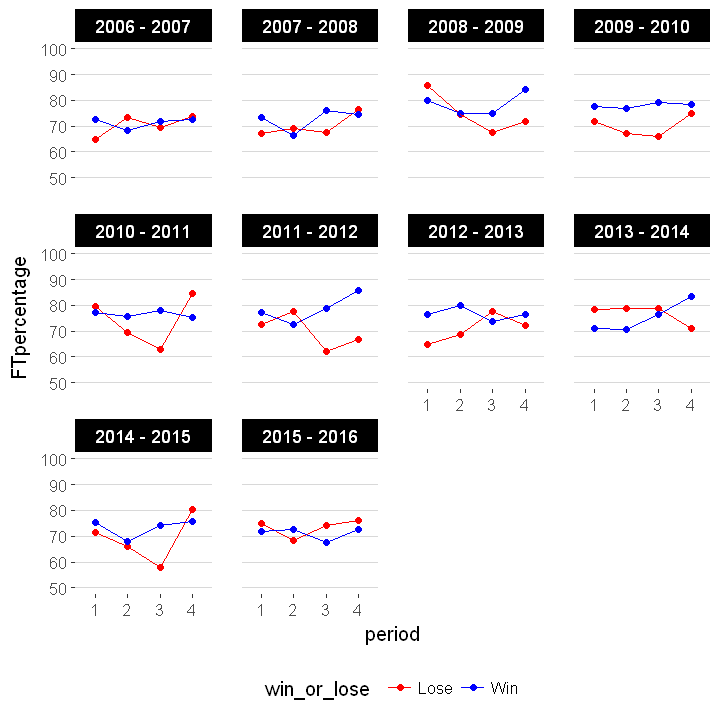

In [73]:
x19 <- kingJames %>% 
  group_by(period, season, win_or_lose, shot_made) %>%
  summarise(n = n()) %>%
  mutate(FTpercentage = n / sum(n)*100) %>%
  filter(shot_made == 1, as.numeric(period) < 5)

ggplot(data = x19, aes(x = period, y = FTpercentage, color = win_or_lose)) + 
    geom_point()+
    geom_line(aes(group = win_or_lose)) +
    facet_wrap(~season) +
    scale_color_manual(values=c("red", "blue"))+
    scale_y_continuous(limits = c(50, 100))+
    theme_x 

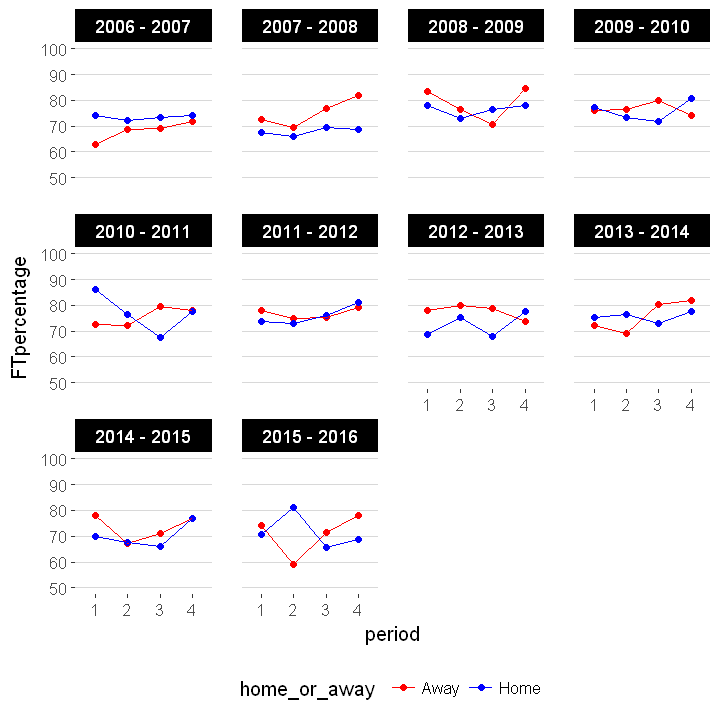

In [74]:
x20 <- kingJames %>% 
  group_by(period, season, home_or_away, shot_made) %>%
  summarise(n = n()) %>%
  mutate(FTpercentage = n / sum(n)*100) %>%
  filter(shot_made == 1, as.numeric(period) < 5)

ggplot(data = x20, aes(x = period, y = FTpercentage, color = home_or_away)) + 
    geom_point()+
    geom_line(aes(group = home_or_away)) +
    facet_wrap(~season) +
    scale_color_manual(values=c("red", "blue"))+
    scale_y_continuous(limits = c(50, 100))+
    theme_x 

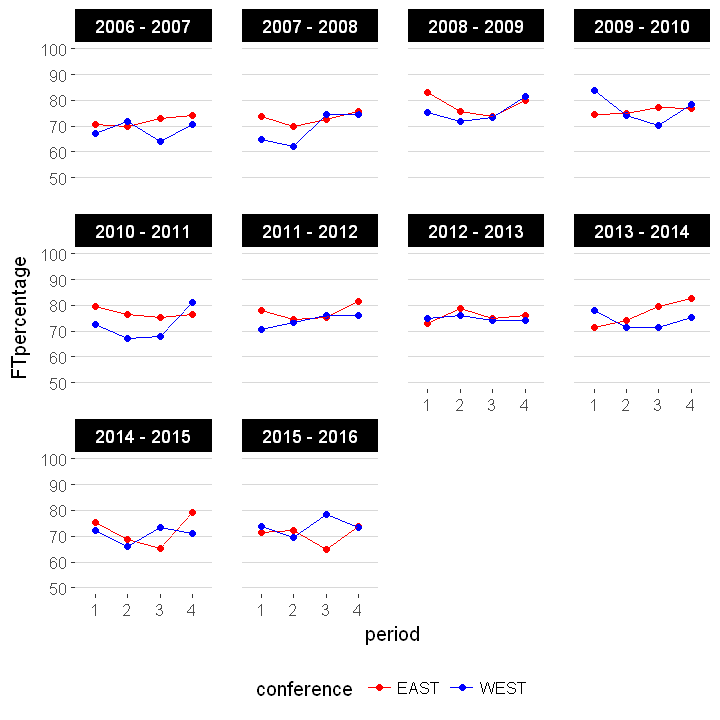

In [75]:
x21 <- kingJames %>% 
  group_by(period, season, conference, shot_made) %>%
  summarise(n = n()) %>%
  mutate(FTpercentage = n / sum(n)*100) %>%
  filter(shot_made == 1, as.numeric(period) < 5)

ggplot(data = x21, aes(x = period, y = FTpercentage, color = conference)) + 
    geom_point()+
    geom_line(aes(group = conference)) +
    facet_wrap(~season) +
    scale_color_manual(values=c("red", "blue"))+
    scale_y_continuous(limits = c(50, 100))+
    theme_x 

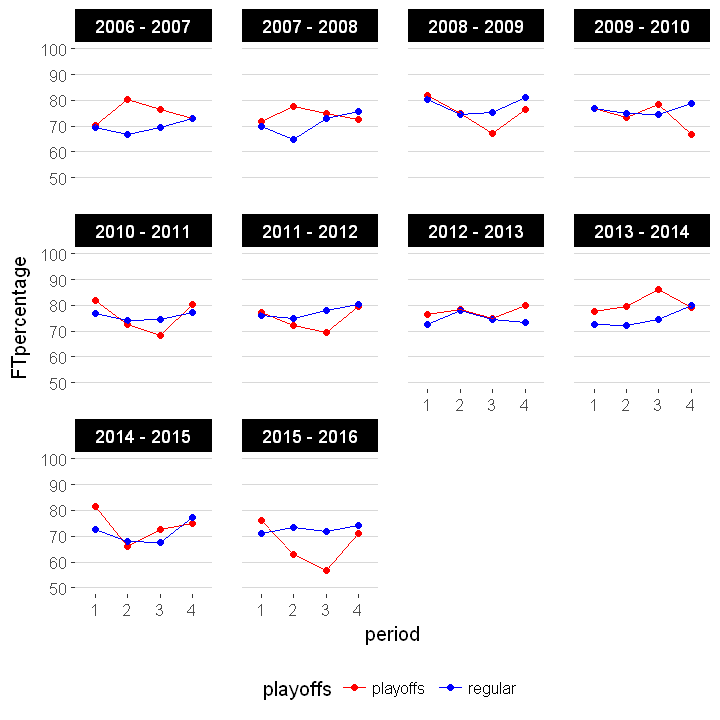

In [76]:
x22 <- kingJames %>% 
  group_by(period, season, playoffs, shot_made) %>%
  summarise(n = n()) %>%
  mutate(FTpercentage = n / sum(n)*100) %>%
  filter(shot_made == 1, as.numeric(period) < 5)

ggplot(data = x22, aes(x = period, y = FTpercentage, color = playoffs)) + 
    geom_point()+
    geom_line(aes(group = playoffs)) +
    facet_wrap(~season) +
    scale_color_manual(values=c("red", "blue"))+
    scale_y_continuous(limits = c(50, 100))+
    theme_x 

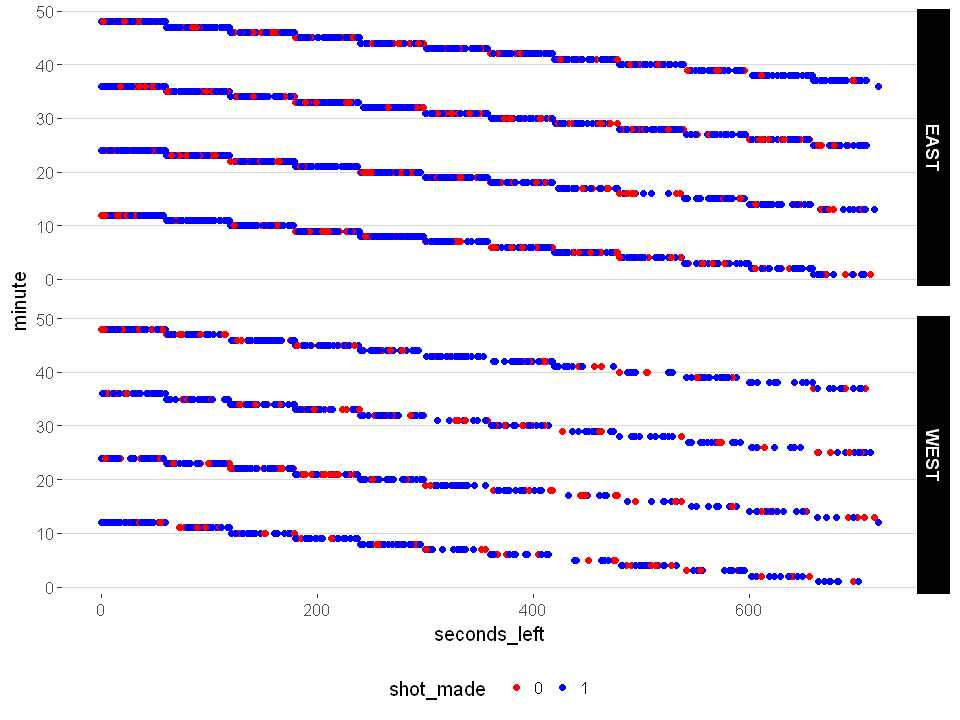

In [77]:
options(repr.plot.width=8, repr.plot.height=6)
x23 <- kingJames %>% 
  group_by(minute, seconds_left,conference, shot_made) %>%
  filter( conference != 'NONE',
         as.numeric(period) < 5)

ggplot(data = x23, aes(x = seconds_left,y =minute ,color = shot_made)) + 
  geom_point()+
  facet_grid(conference~.)+
  scale_color_manual(values=c("red", "blue"))+
  theme_x

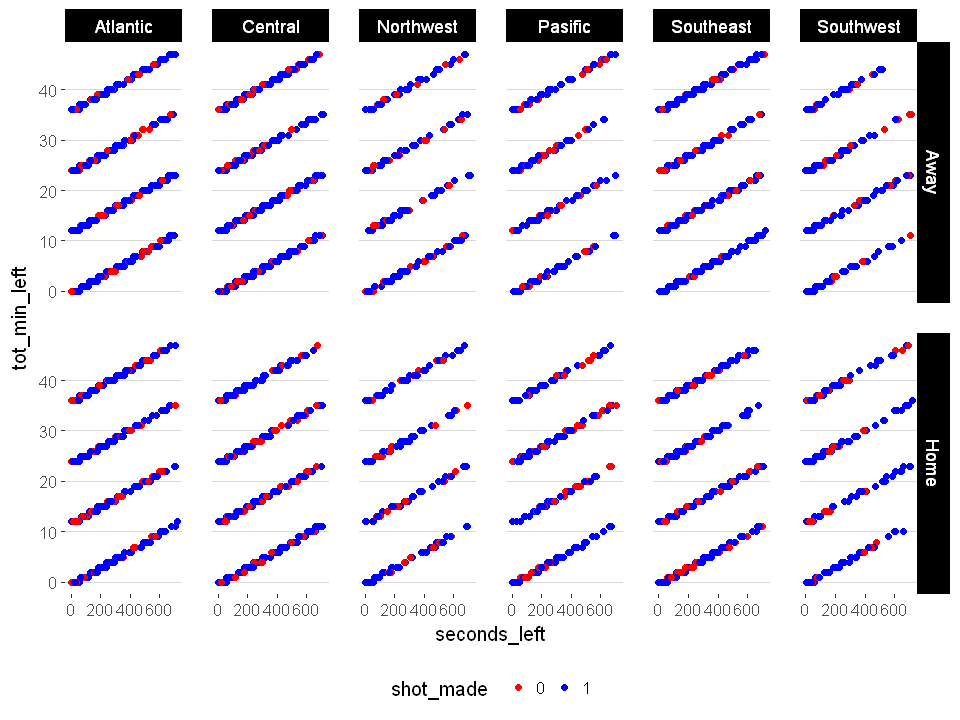

In [78]:
x24 <- kingJames %>% 
  group_by(tot_min_left,seconds_left,division,home_or_away, shot_made) %>%
  filter( conference != 'NONE')

ggplot(data = x24, aes(x = seconds_left,y =tot_min_left,color = shot_made)) + 
  geom_point()+
  facet_grid(home_or_away~division)+
  scale_color_manual(values=c("red", "blue"))+
  theme_x

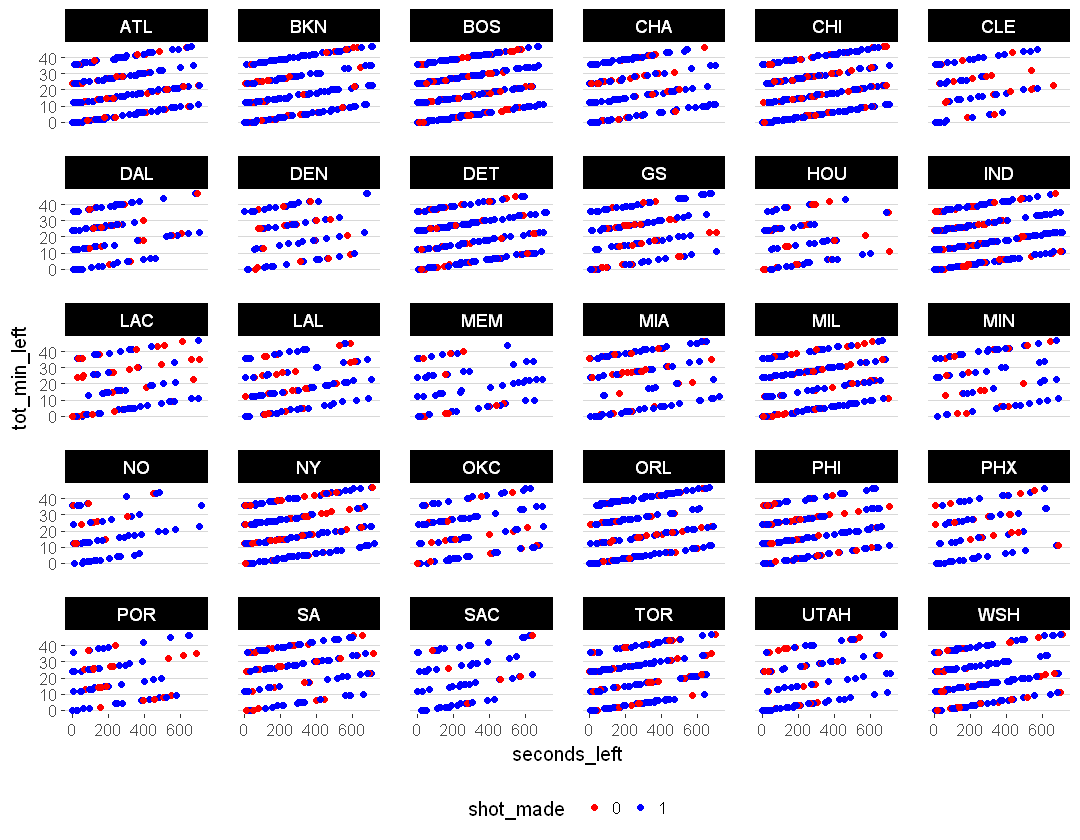

In [79]:
options(repr.plot.width=9, repr.plot.height=7)

x25 <- kingJames %>% 
  group_by(tot_min_left,seconds_left,opponent, shot_made) %>%
  filter( conference != 'NONE')

ggplot(data = x25, aes(x = seconds_left,y =tot_min_left,color = shot_made)) + 
  geom_point()+
  facet_wrap(~opponent)+
  scale_color_manual(values=c("red", "blue"))+
  theme_x